<a href="https://colab.research.google.com/github/luoldrigues/python_for_ai_covid/blob/main/Git_Projeto_Python_for_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Python for AI

#### Turma 2021


# Bibliotecas Iniciais e Importação dos Dados

In [ ]:
# Importando biblioteca para manipulação de dados pandas
import pandas as pd

# Importando dataframe
df_full = pd.read_csv("/content/drive/MyDrive/Python_for_AI/caso_full.csv")
df_full

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0000,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0000,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0000,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0000,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0000,0,3,city,AC,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904891,Tupirama,1721257.0,2021-04-14,202115,1922.0,1891.0,False,True,128,6659.72945,2021-04-12,0.0156,2,327,city,TO,0,0
1904892,Tupiratins,1721307.0,2021-04-14,202115,2729.0,2671.0,False,True,59,2161.96409,2021-04-12,0.0169,1,327,city,TO,0,0
1904893,Wanderlândia,1722081.0,2021-04-14,202115,11734.0,11683.0,False,True,687,5854.78098,2021-04-12,0.0116,8,352,city,TO,0,0
1904894,Xambioá,1722107.0,2021-04-14,202115,11520.0,11540.0,False,True,1749,15182.29167,2021-04-12,0.0114,20,341,city,TO,0,0


Fonte de dados: https://brasil.io/dataset/covid19/caso_full/

# Analisando Dataframe

In [ ]:
# Obtendo o numero de linhas e colunas do dataframe
df_full.shape

(1904896, 18)

In [ ]:
# Obtentendo mais informações para conhecer melhor o dataframe
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904896 entries, 0 to 1904895
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

In [ ]:
# Obtendo a quantidade de dados coletados em cada estado
df_full.groupby('state').size()

state
AC      8169
AL     36032
AM     22759
AP      6162
BA    142365
CE     67192
DF      1193
ES     29194
GO     80973
MA     75942
MG    278117
MS     26617
MT     47373
PA     52106
PB     75996
PE     66672
PI     74388
PR    133340
RJ     34834
RN     58350
RO     18650
RR      6165
RS    162566
SC    101586
SE     26551
SP    224414
TO     47190
dtype: int64

####Separando dados estatísticos de estado e cidade (place_type)

In [ ]:
# Obtendo dados somente dos estados
df_states = df_full.query('place_type == "state"')
df_states

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0000,0,1,state,AC,3,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0000,0,2,state,AC,0,0
5,NaN,12.0,2020-03-19,202012,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0000,0,3,state,AC,1,0
7,NaN,12.0,2020-03-20,202012,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0000,0,4,state,AC,3,0
9,NaN,12.0,2020-03-21,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0000,0,5,state,AC,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904335,NaN,17.0,2021-04-10,202114,1590248.0,1572866.0,False,False,148065,9310.81190,2021-04-10,0.0152,2248,389,state,TO,313,21
1904475,NaN,17.0,2021-04-11,202115,1590248.0,1572866.0,False,False,148347,9328.54498,2021-04-11,0.0153,2269,390,state,TO,282,21
1904615,NaN,17.0,2021-04-12,202115,1590248.0,1572866.0,False,False,149269,9386.52336,2021-04-12,0.0153,2289,391,state,TO,922,20
1904755,NaN,17.0,2021-04-13,202115,1590248.0,1572866.0,True,False,150210,9445.69652,2021-04-13,0.0154,2309,392,state,TO,941,20


In [ ]:
# Obtendo dados somente das cidades e removendo dados estatisticos de casos novos negativos.
df_cities_full = df_full.query('place_type == "city" & new_confirmed > 0')
df_cities_full

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0000,0,1,city,AC,3,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0000,0,3,city,AC,1,0
6,Rio Branco,1200401.0,2020-03-20,202012,413418.0,407319.0,False,False,7,1.69320,2020-03-20,0.0000,0,4,city,AC,3,0
8,Rio Branco,1200401.0,2020-03-21,202012,413418.0,407319.0,False,False,11,2.66075,2020-03-21,0.0000,0,5,city,AC,4,0
12,Rio Branco,1200401.0,2020-03-23,202013,413418.0,407319.0,False,False,17,4.11206,2020-03-23,0.0000,0,7,city,AC,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904607,Taipas do Tocantins,1720937.0,2021-04-12,202115,2166.0,2148.0,True,False,66,3047.09141,2021-04-12,0.0000,0,325,city,TO,3,0
1904609,Tocantinópolis,1721208.0,2021-04-12,202115,22845.0,22870.0,True,False,1783,7804.77128,2021-04-12,0.0168,30,363,city,TO,6,0
1904612,Tupiratins,1721307.0,2021-04-12,202115,2729.0,2671.0,True,False,59,2161.96409,2021-04-12,0.0169,1,325,city,TO,4,0
1904613,Wanderlândia,1722081.0,2021-04-12,202115,11734.0,11683.0,True,False,687,5854.78098,2021-04-12,0.0116,8,350,city,TO,1,0


# Explorando os dados

O conjunto de dados de covid é muito grande, portanto vamos separa algumas dados para fazer uma análise por amostragem

In [ ]:
# Obtendo amostragem de 15% da base de dados das cidades aleatóriamente
df_cities = df_cities_full.sample(frac=0.15)

# Exibindo os dados de amostragem
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121058 entries, 1173619 to 93218
Data columns (total 18 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   city                                           121058 non-null  object 
 1   city_ibge_code                                 120624 non-null  float64
 2   date                                           121058 non-null  object 
 3   epidemiological_week                           121058 non-null  int64  
 4   estimated_population                           120624 non-null  float64
 5   estimated_population_2019                      120624 non-null  float64
 6   is_last                                        121058 non-null  bool   
 7   is_repeated                                    121058 non-null  bool   
 8   last_available_confirmed                       121058 non-null  int64  
 9   last_available_confirmed_per_100

In [ ]:
# Listando primeiras linhas da amostragem para analisar os dados
df_cities.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1173619,São João,4124806.0,2020-12-08,202050,10181.0,10241.0,False,False,300,2946.66536,2020-12-08,0.0133,4,208,city,PR,4,1
1510352,Luiz Alves,4210001.0,2020-05-14,202020,13107.0,12859.0,False,False,2,15.25902,2020-05-14,0.0000,0,5,city,SC,1,0
1324713,Cacaulândia,1100601.0,2020-09-10,202037,6269.0,6230.0,False,False,78,1244.21758,2020-09-10,0.0000,0,122,city,RO,1,0
629033,Rio Acima,3154804.0,2020-11-26,202048,10420.0,10312.0,False,False,292,2802.30326,2020-11-26,0.0137,4,189,city,MG,1,0
983886,Pesqueira,2610905.0,2020-10-20,202043,67735.0,67395.0,False,False,1286,1898.57533,2020-10-20,0.0272,35,187,city,PE,1,1


In [ ]:
# Cruiando nosso dataframe principal, selecionando as colunas que serão trabalhadas
df = df_cities[["city","date","state","epidemiological_week","new_confirmed","new_deaths","estimated_population"]]
df.head()

,city,date,state,epidemiological_week,new_confirmed,new_deaths,estimated_population
1173619,São João,2020-12-08,PR,202050,4,1,10181.0
1510352,Luiz Alves,2020-05-14,SC,202020,1,0,13107.0
1324713,Cacaulândia,2020-09-10,RO,202037,1,0,6269.0
629033,Rio Acima,2020-11-26,MG,202048,1,0,10420.0
983886,Pesqueira,2020-10-20,PE,202043,1,1,67735.0


**Dicionário dos dados**

1. city: nome da cidade
1. date: data de coleta dos dados
1. state: estado
1. epidemiological_week: semana epidemiologica
1. new_confirmed: numero de casos confirmados
1. new_deaths: numero de óbitos
1. estimated_population: populacao estimada

In [ ]:
# Visualizando os estados do dataframe
df["state"].unique()

array(['PR', 'SC', 'RO', 'MG', 'PE', 'GO', 'SP', 'BA', 'PB', 'SE', 'RS',
       'MS', 'AL', 'PI', 'MT', 'CE', 'PA', 'RJ', 'MA', 'TO', 'DF', 'AP',
       'RN', 'ES', 'RR', 'AM', 'AC'], dtype=object)

In [ ]:
# Calculando a quantidade de registros por estado, e criando um dataframe gp_states com o nome das colunas state e confirmed_cases respectivamente
gp_states = df["state"].value_counts().rename_axis("state").to_frame("confirmed_cases")
gp_states

,confirmed_cases
state,
SP,17131
MG,11526
BA,11194
PR,9843
RS,8764
SC,8154
CE,5461
PE,5018
GO,4507


In [ ]:
# Listando os 5 estados com mais casos registrados
states_top5 = df["state"].value_counts()[:5]
states_top5.keys().tolist()

['SP', 'MG', 'BA', 'PR', 'RS']

In [ ]:
# Criando um dataframe somente com o top 5
df_top5 = df.loc[df['state'].isin(states_top5.keys().tolist())]

# Calculando numero de casos agrupados por estado
df_top5['state'].value_counts()

SP    17131
MG    11526
BA    11194
PR     9843
RS     8764
Name: state, dtype: int64

# Graficos com Pyplot e Seaborn

In [ ]:
# Importando biblioteca de manipulação grafica pyplot
import matplotlib.pyplot as plt

# Utilizado em ambiente notebook para que os gráficos sejam renderizados
%matplotlib inline 

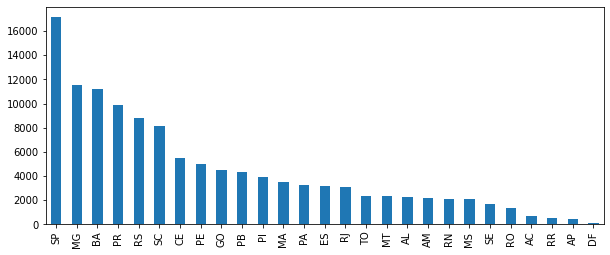

In [ ]:
# Exibindo dados agrupados por estado
df["state"].value_counts().plot.bar(figsize=(10,4))

O grafico acima demonstra os estados ordenados do maior para o menor em numero de casos registrados, de todo dataframe coletado.

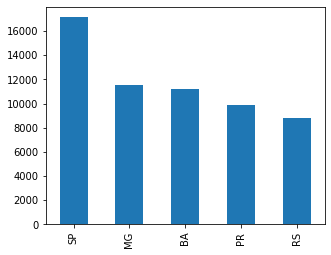

In [ ]:
# Exibindo dados grupados por estado do top 5 (5 estados com mais casos registrados)
df_top5["state"].value_counts().plot.bar(figsize=(5,4))

No grafico acima conseguimos ver a quantidade de dados coletados separado por estado. Podemos ver que o estado que houve mais casos nesse período foi o estado de SP seguido por MG, BA, PR e RS, de acordo com os dados da amostragem.

In [ ]:
# Importando biblioteca de seaborn: statistical data visualization
import seaborn as sns

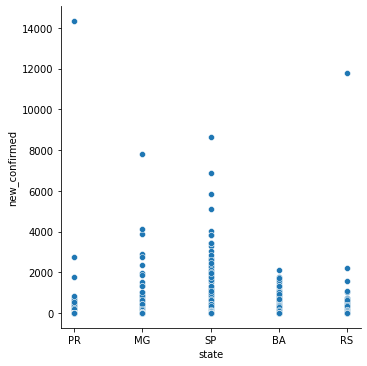

In [ ]:
sns.relplot(x="state", y="new_confirmed", data=df_top5);

No grafico acima conseguimos ver a quantidade de novos casos confirmado  separado por estado. Podemos ver que o estado que houve mais casos nesse período foi o estado de SP seguido por MG, BA, PR e RS, de acordo com os dados da amostragem.

In [ ]:
# Grafico de linhas comparando o numero de casos em cada estado (top 5), agrupado por epidemiological_week
df_top5["epidemiological_week"].value_counts()

df_group = df_top5.groupby(["state","epidemiological_week"],as_index = False).sum().pivot(index="epidemiological_week",columns="state",values="new_confirmed").fillna(0)

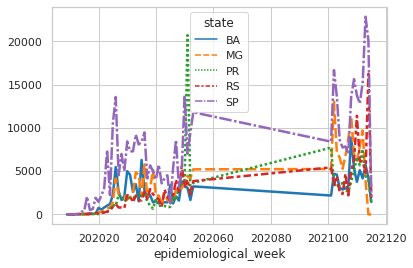

In [ ]:
sns.set_theme(style="whitegrid")

sns.lineplot(data=df_group, palette="tab10", linewidth=2.5)

No grafico acima conseguimos ver  através  de linhas comparando o numero de casos em cada estado, os picos epidemiologico dos 5 estados mais afedatos pela covid-19

# Geopandas

In [ ]:
# Instalando geopandas
!pip install --upgrade geopandas

     |████████████████████████████████| 1.0MB 5.8MB/s 
     |████████████████████████████████| 6.5MB 12.3MB/s 
     |████████████████████████████████| 15.3MB 330kB/s 


In [ ]:
# Importando biliotega geopandas
import geopandas as gpd

# Dados geograficos baixados do site do IBGE - https://www.ibge.gov.br/geociencias/downloads-geociencias.html (cartas_e_mapas > bases_cartograficas_continuas > bcim > geopackage > bcim_2016_21_11_2018.gpkg)
INFOS_UFS = gpd.read_file("/content/drive/MyDrive/Python_for_AI/bcim_2016_21_11_2018.gpkg", layer="lim_unidade_federacao_a")

INFOS_UFS.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

Estado: Mato Grosso do Sul


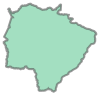

In [ ]:
# Explorando os dados geograficos do IBGE
print("Estado: " + INFOS_UFS.nome[1])
INFOS_UFS.geometry[1]

In [ ]:
# renomeando coluna 'sigla' p/ 'state', (p/ se tornar uma coluna em comum entre os dataframes)
INFOS_UFS.rename({"sigla": "state"}, axis = 1, inplace = True)

# Criando novo dataframe e relacionando com os dados de covid (gp_states = grupo por estado)
MAPA_BRASIL = INFOS_UFS.merge(gp_states, on = "state", how = "left")

# Visualizando primeiros registros, selecionando colunas state, new_confirmed e geometry
MAPA_BRASIL[["state", "confirmed_cases", "geometry"]].head()

,state,confirmed_cases,geometry
0,GO,4507,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,2080,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,9843,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,11526,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,1704,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


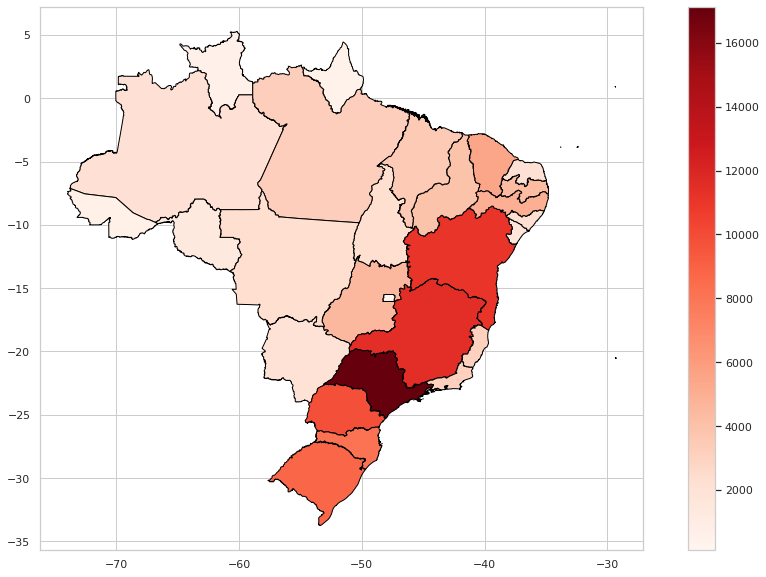

In [ ]:
MAPA_BRASIL.plot(column = "confirmed_cases", # Indicador analisado
                 cmap = 'Reds',              # Paleta de cor vermelha
                 figsize = (16,10),          # Tamanho da imagem (plot)
                 legend = True,              # Exibir legenda
                 edgecolor = '#000')         # Cor das bordas (preto em hexadecimal)

No grafico acima temos o mapa do Brasil onde é possivel obsevar o avanço da pandemia nos estado, e o estado com maior numero de infectados.

# Links de estudo

##### Covid 19 Global Data Time Series Predictions with Lstm Recurrent Neural Networks
https://melaniesoek0120.medium.com/covid-19-global-data-time-series-prediction-with-lstm-recurrent-neural-networks-f7825c4a1f6f

##### Tecnicas de Amostragem de dados utilizando python
https://minerandodados.com.br/tres-tecnicas-de-amostragem-de-dados-utilizando-python/

##### Coeficientes de Correlação
https://operdata.com.br/blog/coeficientes-de-correlacao/

##### How to pass through a list of queries to a pandas dataframe, and output the list of results?
https://www.reddit.com/r/learnpython/comments/5719vx/how_to_pass_through_a_list_of_queries_to_a_pandas/

##### Pandas DataFrame Groupby two columns and get counts
https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts

##### Seaborn Example Gallery
https://seaborn.pydata.org/examples/

##### Reshaping and pivot tables
https://pandas.pydata.org/docs/user_guide/reshaping.html

##### Data Visualization: How To Plot A Map with Geopandas in Python?
https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

##### Geopandas in Google Colab
https://stackoverflow.com/questions/65324533/geopandas-in-google-colab

##### pandas.DataFrame.merge
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

##### Brazilian States Choropleth Map with Python
https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585